# Chapter 3 - Excercise 3.1

In [ ]:
'''
Something like the class size paradox appears if you survey children and ask how many
children are in their family. Families with many children are more likely to appear in
your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the
number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and
asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place,
you can use chap03ex. ipynb.
'''

In [2]:
import numpy as np
import nsfg
import thinkstats2
import thinkplot

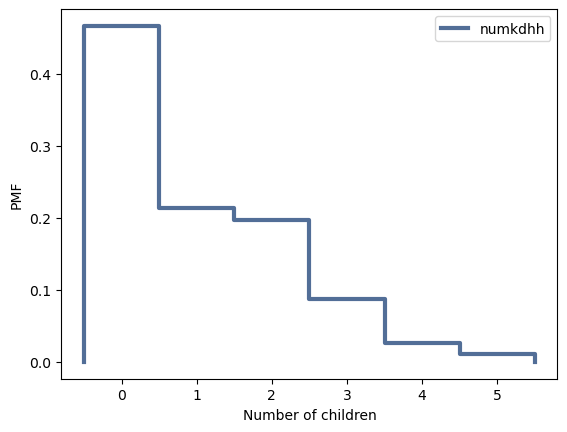

In [4]:
resp = nsfg.ReadFemResp()
pmf = thinkstats2.Pmf(resp.numkdhh, label="numkdhh")
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Number of children", ylabel="PMF")

In [6]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

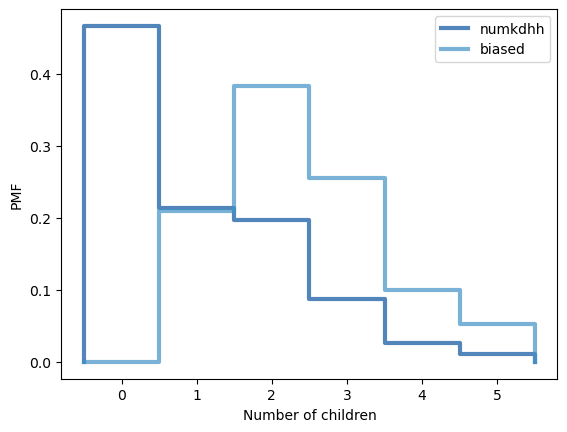

In [8]:
biased = BiasPmf(pmf, label="biased")
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel="Number of children", ylabel="PMF")

In [10]:
pmf.Mean()

1.024205155043831

In [12]:
biased.Mean()

2.403679100664282

# Chapter 3 - Excercise 3.2

In [ ]:
'''
Write functions called PmfMean and PmfVar that take a Pmf object and compute the
mean and variance. To test these methods, check that they are consistent with the
methods Mean and Var provided by Pmf.
'''

In [14]:
pmf_Test1 = thinkstats2.Pmf([1, 2, 2, 2, 3, 3, 4, 5])

In [16]:
# Pmf Mean function
def PmfMean(pmf):
    """Computes the mean of a PMF.

    Returns:
        float mean
    """
    mean = 0.0
    for x, p in pmf.d.items():
        mean += p * x
    return mean
print(PmfMean(pmf_Test1))
print(pmf_Test1.Mean())


2.75
2.75


In [118]:
# Pmf Variance function
def PmfVar(pmf, mu=None):
    """Computes the variance of a PMF.

    Args:
        mu: the point around which the variance is computed;
            if omitted, computes the mean

    Returns:
        float variance
    """
    if mu is None:
        mu = pmf.Mean()

    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mu) ** 2
    return var

print(PmfVar(pmf_Test1,))
print(pmf_Test1.Var())

1.4375
1.4375


# Chapter 4 - Excercise 4.1

In [ ]:
'''
How much did you weigh at birth? If you don't know, call your mother or someone else
who knows. Using the NSFG data (all live births), compute the distribution of birth
weights and use it to find your percentile rank. If you were a first baby, find your per-
centile rank in the distribution for first babies. Otherwise use the distribution for others.
If you are in the 90th percentile or higher, call your mother back and apologize.
'''

In [26]:
import first
live, firsts, others = first.MakeFrames()
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

In [28]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [34]:
other_cdf.PercentileRank(7.8)

63.101604278074866

# Chapter 4 - Excercise 4.2

In [ ]:
'''
The numbers generated by random. random are supposed to be uniform between 0 and
1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random. random and plot their PMF and CDF. Is the dis-
tribution uniform?
'''

In [40]:
t = np.random.random(1000)

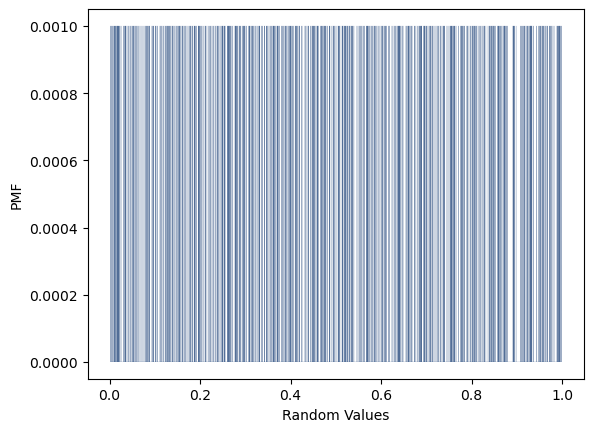

In [48]:
pmf = thinkstats2.Pmf(t)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random Values', ylabel='PMF')

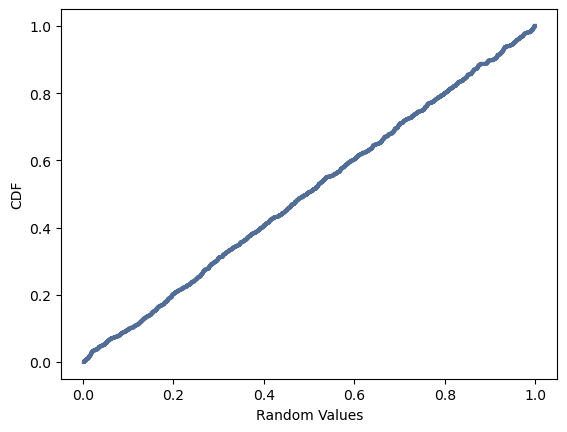

In [50]:
cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random Values', ylabel='CDF')

In [ ]:
# The distribution is uniform as all random valiues have the same probability to occur. what i